# Assignment 04

**Citation:** The following questions and supporting code were originally developed as part of Dr. Eric Eaton's [Introduction to Machine Learning Course at U Penn](https://www.cis.upenn.edu/~cis5190/fall2014/). 



**DO NOT USE PyTorch's automatic differentiation capabilities to solve this problem**

In [1]:
from typing import Optional, Tuple, List, Dict

import matplotlib.pyplot as plt
import numpy as np

from utils import load_dataset
# from keras.datasets import mnist

# When choosing your batches / Shuffling your data you should use this RNG variable, and not `np.random.choice` etc.
RNG = np.random.RandomState(seed=446)

def load_2_7_mnist():
    """
    Loads MNIST data, extracts only examples with 2, 7 as labels, and converts them into -1, 1 labels, respectively.

    Returns:
        Dataset: 2 tuples of numpy arrays, each containing examples and labels.
            First tuple is for training, while second is for testing.
            Shapes as as follows: ((n, d), (n,)), ((m, d), (m,))
    """
    (x_train, y_train), (x_test, y_test) = load_dataset("mnist")
    # (x_train, y_train), (x_test, y_test) = mnist.load_data()
    train_idxs = np.logical_or(y_train == 2, y_train == 7)
    test_idxs = np.logical_or(y_test == 2, y_test == 7)

    y_train_2_7 = y_train[train_idxs]
    y_train_2_7 = np.where(y_train_2_7 == 7, 1, -1)

    y_test_2_7 = y_test[test_idxs]
    y_test_2_7 = np.where(y_test_2_7 == 7, 1, -1)

    return (x_train[train_idxs], y_train_2_7), (x_test[test_idxs], y_test_2_7)

In [3]:
# NOTE
# For load_data.py, the following changes were made:

# FROM:
# X_train, labels_train = f['x_train'], f['y_train']
# X_test, labels_test = f['x_test'], f['y_test']

# TO:
# X_train = f['x_train']
# labels_train = f['y_train']
# X_test = f['x_test']
# labels_test = f['y_test']

# Otherwise, this error will occur: "TypeError: 'tuple' object is not callable"

# Stochastic Gradient Descent -- Logistic Regression

**2.1** Here we consider the MNIST dataset, but for binary classification. Specifically, the task is to determine whether a digit is a 2 or 7. Here, let $Y = 1$ for all the “7” digits in the dataset, and use $Y = −1$ for “2”. We will use regularized logistic regression. Given a binary classification dataset $\{(x_i, y_i)\}^{n}_{i=1}$ for $x_i \in \mathbb{R}^{d}$ and $y_i \in \{−1, 1\}$ we showed in class that the regularized negative log likelihood objective function can be written as

$$
J(w, b) = \frac{1}{n}\sum_{i=1}^{m}\log(1 + exp(−y_i (b + x^{T}_i w))) + \lambda\|w\|^{2}_{2}
$$

Note that the offset term $b$ is not regularized. For all experiments, use $\lambda = 10^{−1}$. Let $\mu_i(w, b) = \frac{1}{1+exp(−y_{i} (b+x_{i}^{T} w))}$.
    
**a.** [8 points] Derive the gradients $\nabla_{w} J(w, b)$, $\nabla_{b} J(w, b)$ and give your answers in terms of $\mu_i(w, b)$ (your answers should not contain exponentials).



**Your answer here:**
 
$$
$$

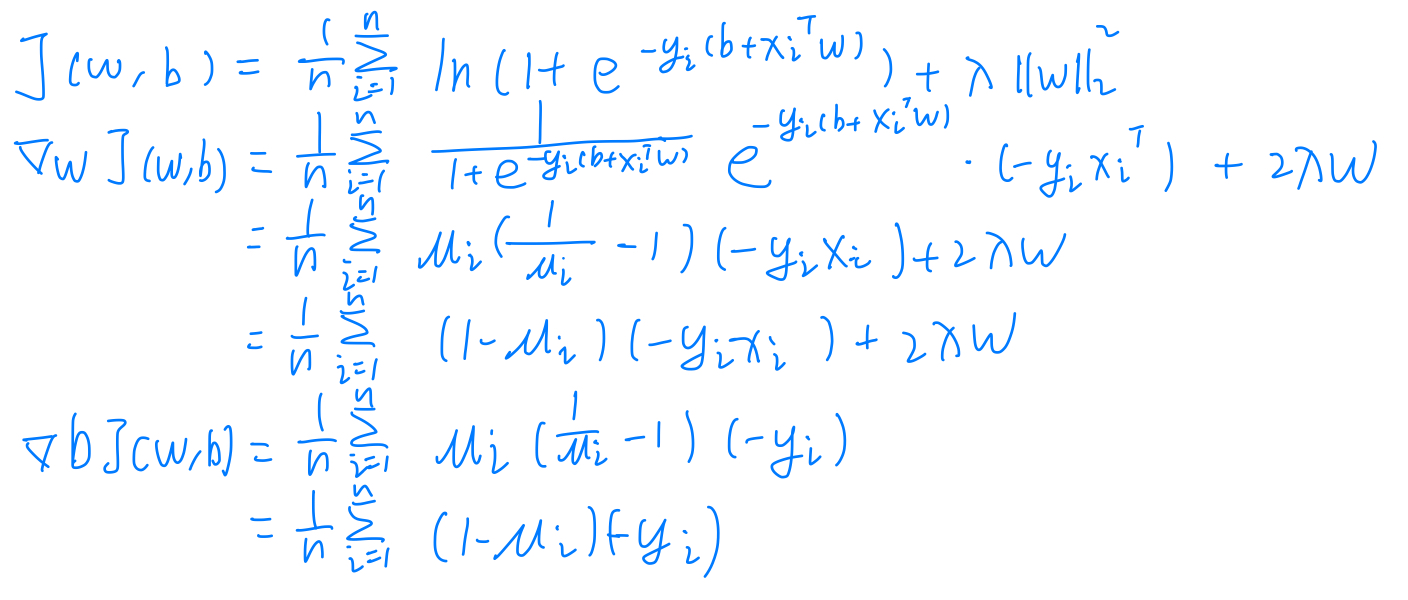

**b.** [8 points] Implement gradient descent with an initial iterate of all zeros. Try several values of step sizes to find one that appears to make convergence on the training set as fast as possible. Run until you feel
you are near to convergence.  

i. For both the training set and the test, plot $J(w, b)$ as a function of the iteration number (and show
both curves on the same plot).  
ii. For both the training set and the test, classify the points according to the rule $\mathrm{sign}(b + x^{T}_{i}w)$ and plot the misclassification error as a function of the iteration number (and show both curves on the same plot).
    
**Reminder:** Make sure you are only using the test set for evaluation (not for training).



In [2]:
%config InlineBackend.figure_format = 'retina'

In [31]:
class BinaryLogReg:
    def __init__(self, _lambda: float = 1e-3):
        """Initializes the Binary Log Regression model.
        NOTE: Please DO NOT change `self.weight` and `self.bias` values, since it may break testing and lead to lost points!

        Args:
            _lambda (float, optional): Ridge Regularization coefficient. Defaults to 1e-3.
        """
        self._lambda: float = _lambda
        # Fill in with matrix with the correct shape
        self.weight: np.ndarray = np.zeros(784)  # type: ignore
        self.bias: float = 0.0
        # raise NotImplementedError("Your Code Goes Here")

    def mu(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate mu in vectorized form, as described in the problem.
        The equation for i^th element of vector mu is given by:

        $$ mu_i = 1 / (1 + exp(-y_i (bias + x_i^T weight))) $$

        Args:
            X (np.ndarray): observations represented as `(n, d)` matrix.
                n is number of observations, d is number of features.
                d = 784 in case of MNIST.
            y (np.ndarray): targets represented as `(n, )` vector.
                n is number of observations.

        Returns:
            np.ndarray: An `(n, )` vector containing mu_i for i^th element.
        """
        # X = X.reshape(X.shape[0], -1)
        
        mu = 1/(1 + np.exp(-y * (self.bias + np.dot(X, self.weight))))
        return mu 
        # raise NotImplementedError("Your Code Goes Here")

    def loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate loss J as defined in the problem.

        Args:
            X (np.ndarray): observations represented as `(n, d)` matrix.
                n is number of observations, d is number of features.
                d = 784 in case of MNIST.
            y (np.ndarray): targets represented as `(n, )` vector.
                n is number of observations.

        Returns:
            float: Loss given X, y, self.weight, self.bias and self._lambda
        """
        # X = X.reshape(X.shape[0], -1)
        
        n = X.shape[0]
        loss = (1/n) * np.sum(np.log(1 + np.exp(-y * (self.bias + np.dot(X, self.weight))))) + self._lambda * np.sum(self.weight**2)  
    
        return loss
        # raise NotImplementedError("Your Code Goes Here")

    def gradient_J_weight(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate gradient of loss J with respect to weight.

        Args:
            X (np.ndarray): observations represented as `(n, d)` matrix.
                n is number of observations, d is number of features.
                d = 784 in case of MNIST.
            y (np.ndarray): targets represented as `(n, )` vector.
                n is number of observations.
        Returns:
            np.ndarray: An `(d, )` vector which represents gradient of loss J with respect to self.weight.
        """
        # X = X.reshape(X.shape[0], -1)
        
        n = X.shape[0]  # Number of observations
        mu = self.mu(X, y)  # Calculate mu values
        gradient_w = (1/n) * np.dot(X.T, -y * (1 - mu)) + 2 * self._lambda * self.weight 
    
        return gradient_w
        # raise NotImplementedError("Your Code Goes Here")

    def gradient_J_bias(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate gradient of loss J with respect to bias.

        Args:
            X (np.ndarray): observations represented as `(n, d)` matrix.
                n is number of observations, d is number of features.
                d = 784 in case of MNIST.
            y (np.ndarray): targets represented as `(n, )` vector.
                n is number of observations.

        Returns:
            float: A number that represents gradient of loss J with respect to self.bias.
        """
        # X = X.reshape(X.shape[0], -1)
        
        n = X.shape[0]  
        mu = self.mu(X, y)
        gradient_b = (1/n) * np.sum((1 - mu) * (-y))

        return gradient_b
        # raise NotImplementedError("Your Code Goes Here")

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Given X, weight and bias predict values of y.

        Args:
            X (np.ndarray): observations represented as `(n, d)` matrix.
                n is number of observations, d is number of features.
                d = 784 in case of MNIST.

        Returns:
            np.ndarray: An `(n, )` array of either -1s or 1s representing guess for each observation.
        """
        # X = X.reshape(X.shape[0], -1)
        
        predictions = np.where(self.bias + np.dot(X, self.weight) >= 0, 1, -1)
        
        return predictions
        # raise NotImplementedError("Your Code Goes Here")

    def misclassification_error(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculates misclassification error (the rate at which this model is making incorrect predictions of y).
        Note that `misclassification_error = 1 - accuracy`.

        Args:
            X (np.ndarray): observations represented as `(n, d)` matrix.
                n is number of observations, d is number of features.
                d = 784 in case of MNIST.
            y (np.ndarray): targets represented as `(n, )` vector.
                n is number of observations.

        Returns:
            float: percentage of times prediction did not match target, given an observation (i.e. misclassification error).
        """
        # X = X.reshape(X.shape[0], -1)
        
        n = X.shape[0]
        predictions = self.predict(X)
        error = np.sum(predictions != y) / n
        
        return error
        # raise NotImplementedError("Your Code Goes Here")

    def step(self, X: np.ndarray, y: np.ndarray, learning_rate: float = 1e-2):
        """Single step in training loop.
        It does not return anything but should update self.weight and self.bias with correct values.

        Args:
            X (np.ndarray): observations represented as `(n, d)` matrix.
                n is number of observations, d is number of features.
                d = 784 in case of MNIST.
            y (np.ndarray): targets represented as `(n, )` vector.
                n is number of observations.
            learning_rate (float, optional): Learning rate of SGD/GD algorithm.
                Defaults to 1e-4.
        """
        # X = X.reshape(X.shape[0], -1)
        
        self.weight -= learning_rate * self.gradient_J_weight(X, y)
        self.bias -= learning_rate * self.gradient_J_bias(X, y)
        # raise NotImplementedError("Your Code Goes Here")

    def train(
        self,
        X_train: np.ndarray,
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray,
        learning_rate: float = 1e-2,
        epochs: int = 30,
        batch_size: int = 100,
    ) -> Dict[str, List[float]]:
        """Train function that given dataset X_train and y_train adjusts weights and biases of this model.
        It also should calculate misclassification error and J loss at the END of each epoch.

        For each epoch please call step function `num_batches` times as defined on top of the starter code.

        NOTE: This function due to complexity and number of possible implementations will not be publicly unit tested.
        However, we might still test it using gradescope, and you will be graded based on the plots that are generated using this function.

        Args:
            X_train (np.ndarray): observations in training set represented as `(n, d)` matrix.
                n is number of observations, d is number of features.
                d = 784 in case of MNIST.
            y_train (np.ndarray): targets in training set represented as `(n, )` vector.
                n is number of observations.
            X_test (np.ndarray): observations in testing set represented as `(m, d)` matrix.
                m is number of observations, d is number of features.
                d = 784 in case of MNIST.
            y_test (np.ndarray): targets in testing set represented as `(m, )` vector.
                m is number of observations.
            learning_rate (float, optional): Learning rate of SGD/GD algorithm. Defaults to 1e-2.
            epochs (int, optional): Number of epochs (loops through the whole data) to train SGD/GD algorithm for.
                Defaults to 30.
            batch_size (int, optional): Number of observation/target pairs to use for a single update.
                Defaults to 100.

        Returns:
            Dict[str, List[float]]: Dictionary containing 4 keys, each pointing to a list/numpy array of length `epochs`:
            {
                "training_losses": [<Loss at the end of each epoch on training set>],
                "training_errors": [<Misclassification error at the end of each epoch on training set>],
                "testing_losses": [<Same as above but for testing set>],
                "testing_errors": [<Same as above but for testing set>],
            }
            Skeleton for this result is provided in the starter code.

        Note:
            - When shuffling batches/randomly choosing batches makes sure you are using RNG variable defined on the top of the file.
        """
        num_batches = int(np.ceil(len(X_train) // batch_size))
        result: Dict[str, List[float]] = {
            "train_losses": [],  # You should append to these lists
            "train_errors": [],
            "test_losses": [],
            "test_errors": [],
        }

        for epoch in range(epochs):
            shuffled_indices = RNG.permutation(len(X_train))
            X_train_shuffled = X_train[shuffled_indices]
            y_train_shuffled = y_train[shuffled_indices]

            for batch_num in range(num_batches):
                start_index = batch_num * batch_size
                end_index = min((batch_num + 1) * batch_size, len(X_train_shuffled))
                X_batch = X_train_shuffled[start_index:end_index]
                y_batch = y_train_shuffled[start_index:end_index]

                self.step(X_batch, y_batch, learning_rate)

            train_loss = self.loss(X_train, y_train)
            train_error = self.misclassification_error(X_train, y_train)
            test_loss = self.loss(X_test, y_test)
            test_error = self.misclassification_error(X_test, y_test)

            result["train_losses"].append(train_loss)
            result["train_errors"].append(train_error)
            result["test_losses"].append(test_loss)
            result["test_errors"].append(test_error)
        return result
        # raise NotImplementedError("Your Code Goes Here")

In [4]:

(x_train, y_train), (x_test, y_test) = load_2_7_mnist()
np.sum(x_train)

1258406.117647058

In [ ]:
# lambda default 0.001
# learning_rate default 0.01
# epochs default 30

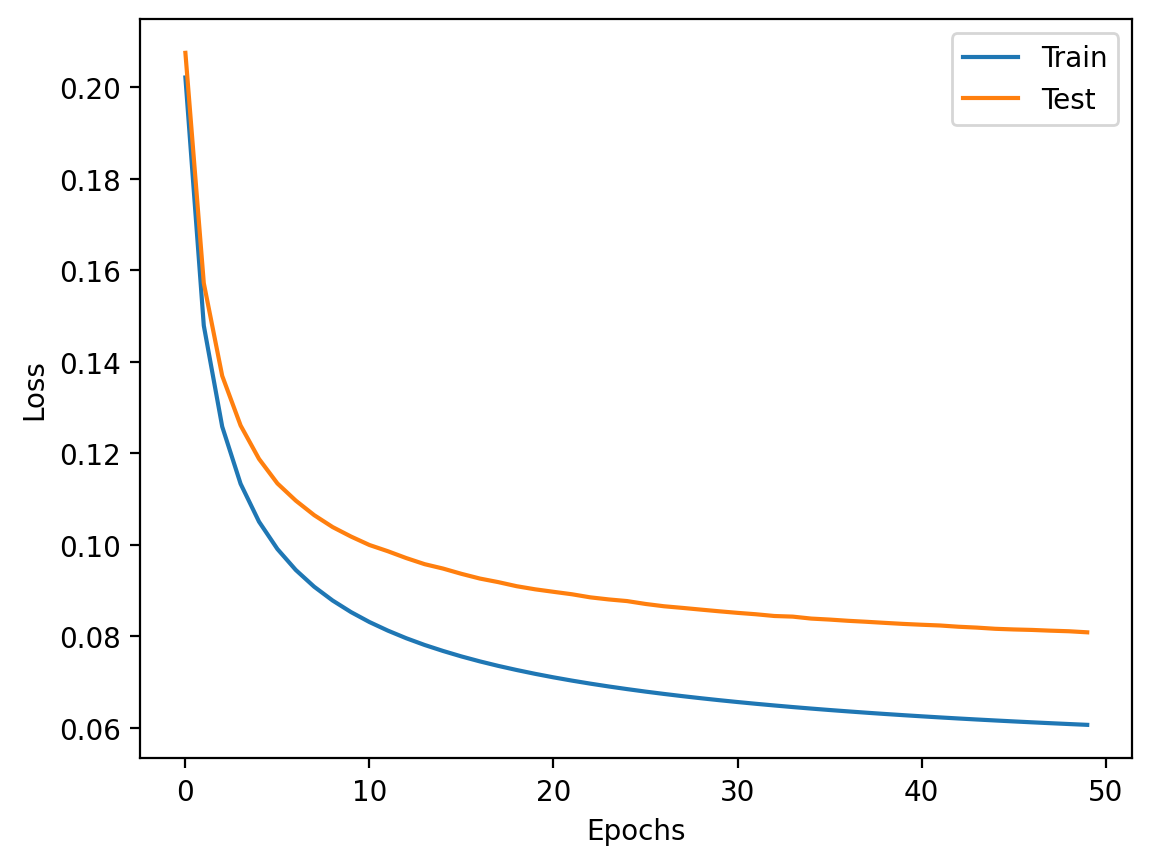

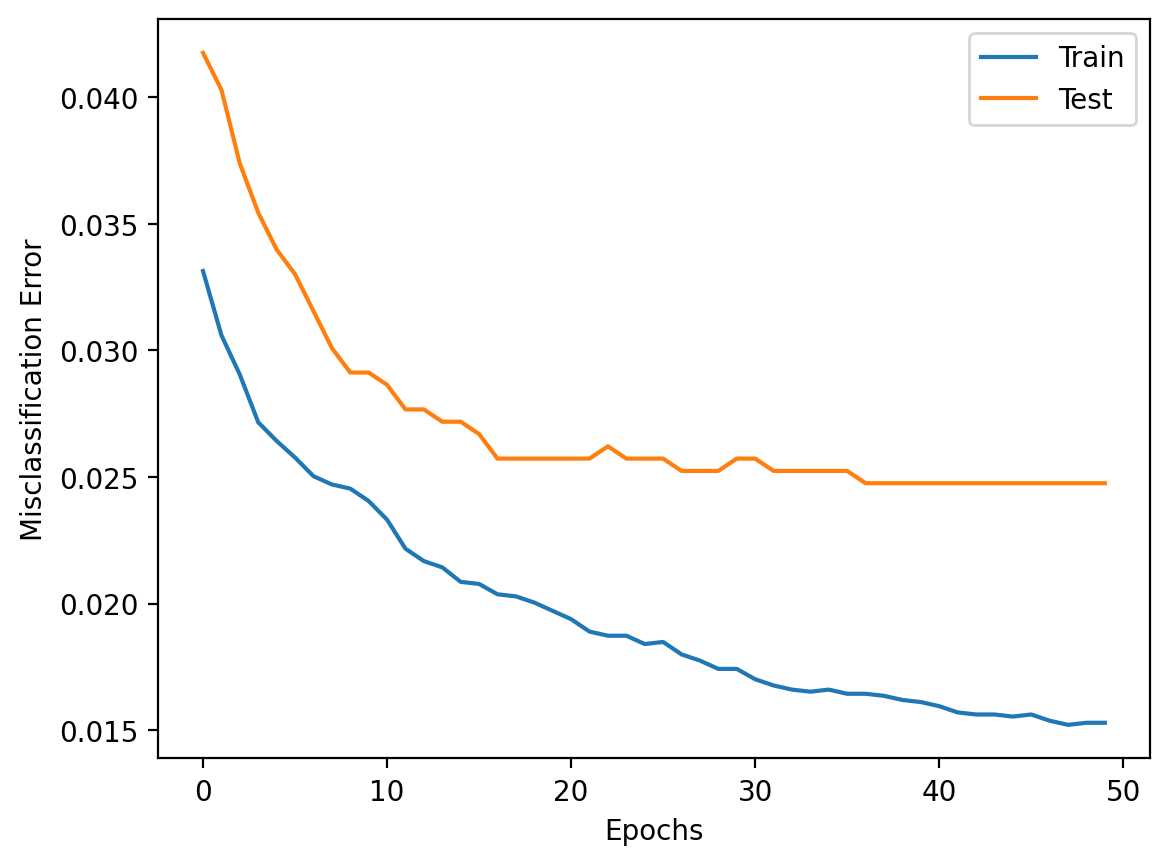

In [32]:
model = BinaryLogReg()
history = model.train(x_train, y_train, x_test, y_test, learning_rate=0.01, epochs=50)

# Plot losses
plt.plot(history["train_losses"], label="Train")
plt.plot(history["test_losses"], label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot error
plt.plot(history["train_errors"], label="Train")
plt.plot(history["test_errors"], label="Test")
plt.xlabel("Epochs")
plt.ylabel("Misclassification Error")
plt.legend()
plt.show()

**c.** [7 points] Repeat (b) using stochastic gradient descent with a batch size of 1. Note, the expected gradient
with respect to the random selection should be equal to the gradient found in part (a). Show both plots
described in (b) when using batch size 1. Take careful note of how to scale the regularizer.

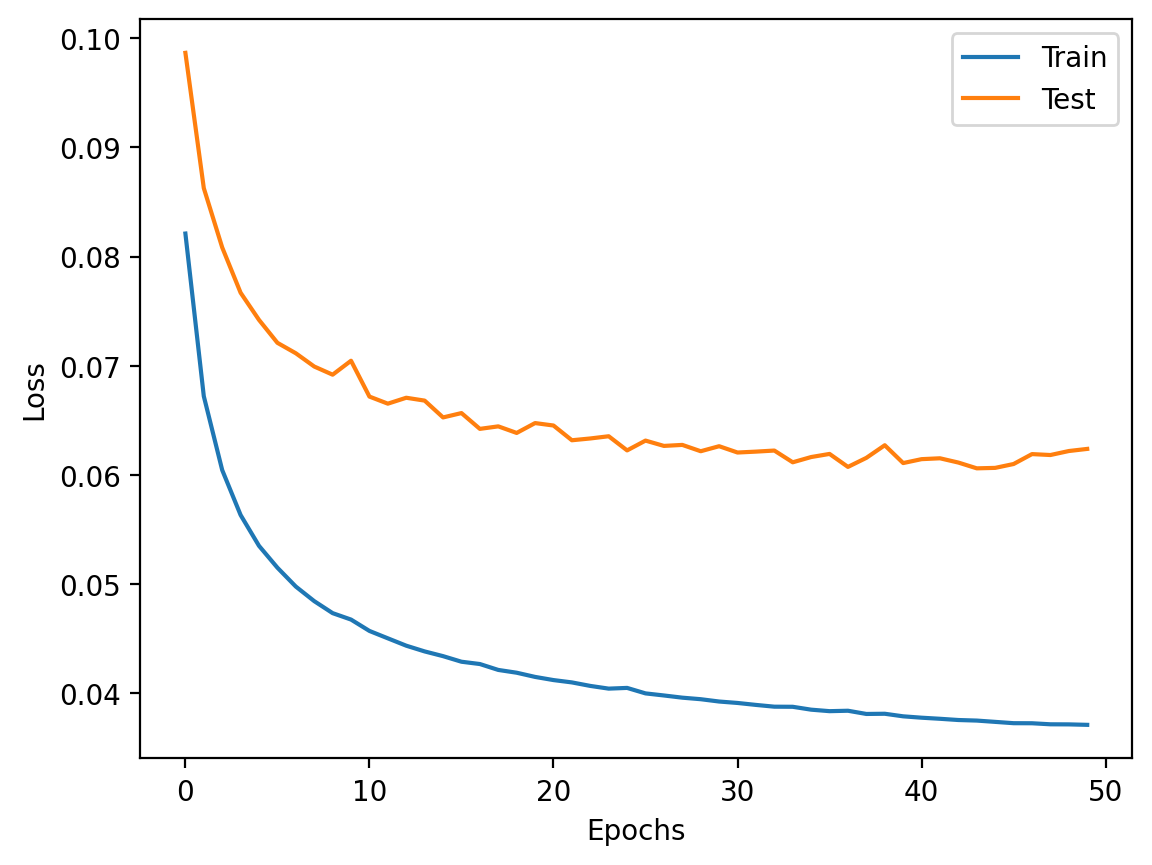

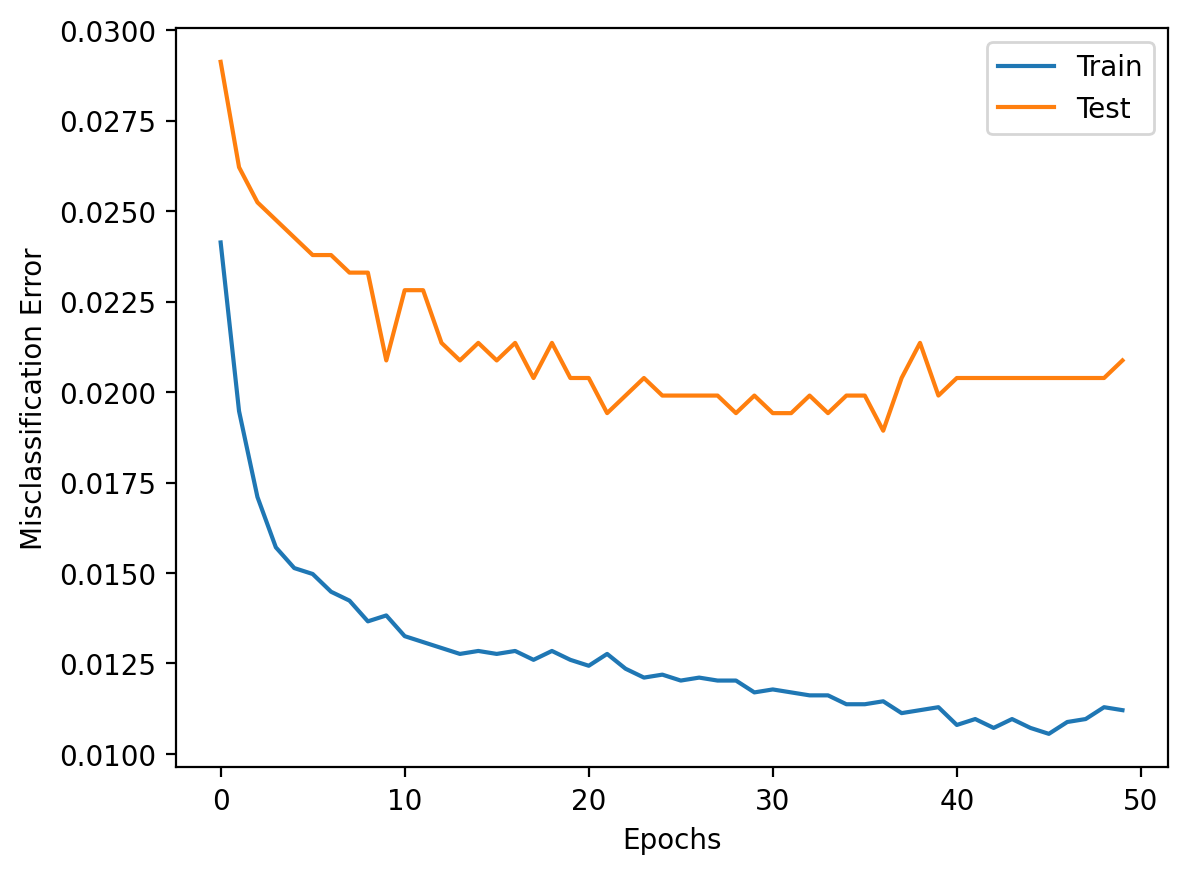

In [51]:
### your code here
model = BinaryLogReg(_lambda=0.0001)
history = model.train(x_train, y_train, x_test, y_test, batch_size=1, learning_rate=0.001, epochs=50)

# Plot losses
plt.plot(history["train_losses"], label="Train")
plt.plot(history["test_losses"], label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot error
plt.plot(history["train_errors"], label="Train")
plt.plot(history["test_errors"], label="Test")
plt.xlabel("Epochs")
plt.ylabel("Misclassification Error")
plt.legend()
plt.show()

**d.** [7 points] Repeat (b) using stochastic gradient descent with batch size of 100. That is, instead of approximating the gradient with a single example, use 100. Note, the expected gradient with respect to the
random selection should be equal to the gradient found in part (a).

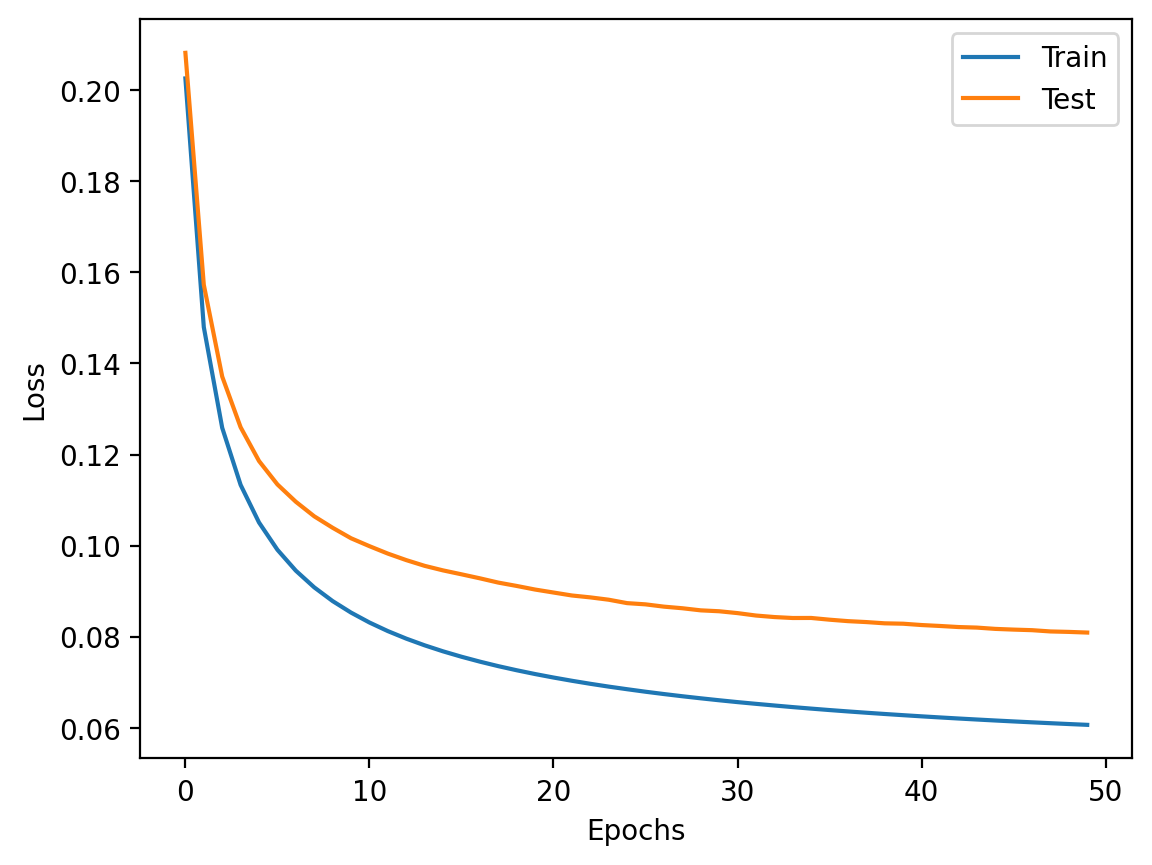

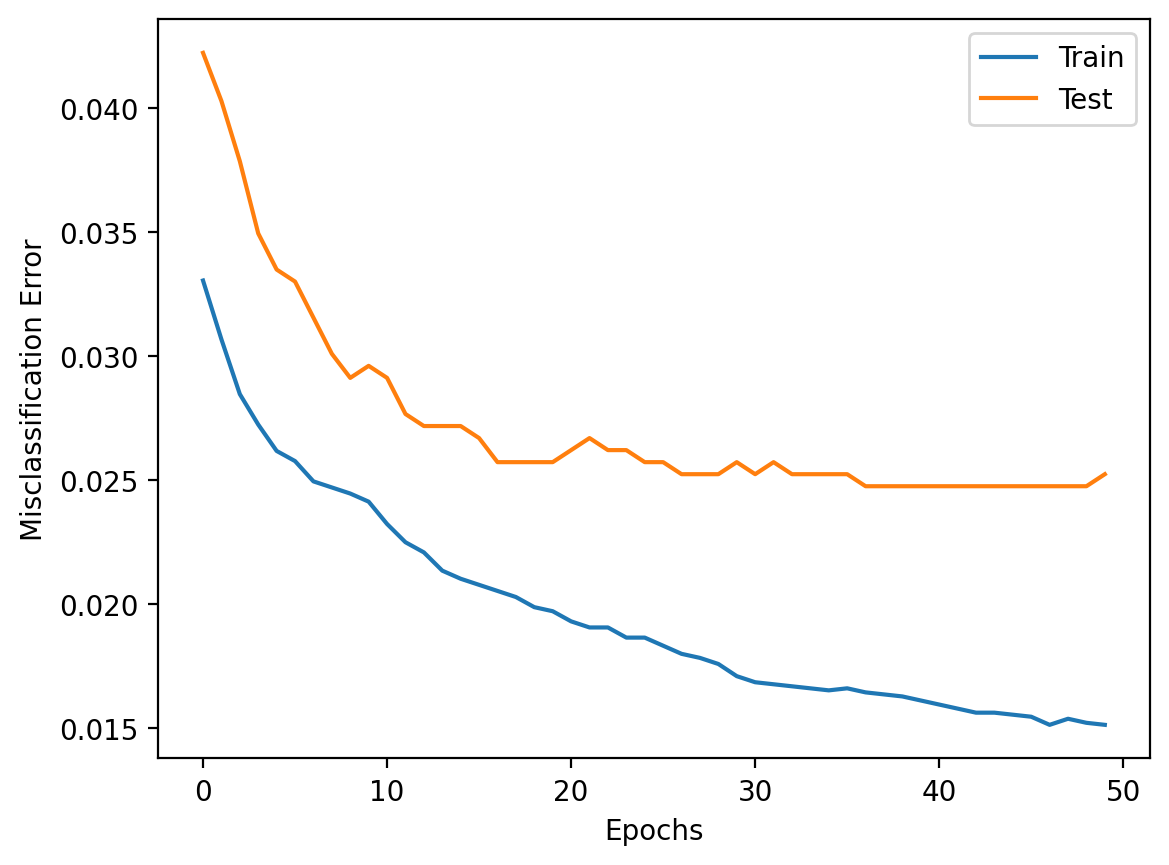

In [52]:
### your code here
model = BinaryLogReg(_lambda=0.001)
history = model.train(x_train, y_train, x_test, y_test, batch_size=100, learning_rate=0.01, epochs=50)

# Plot losses
plt.plot(history["train_losses"], label="Train")
plt.plot(history["test_losses"], label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot error
plt.plot(history["train_errors"], label="Train")
plt.plot(history["test_errors"], label="Test")
plt.xlabel("Epochs")
plt.ylabel("Misclassification Error")
plt.legend()
plt.show()

**What to Submit**
- **Part a:** Proof
- **Part b:** Separate plots for b(i) and b(ii).
- **Part c:** Separate plots for c which reproduce those from b(i) and b(ii) for this case.
- **Part d:** Separate plots for d which reproduce those from b(i) and b(ii) for this case.

# Support Vector Machines

**2.2** Recall that solving the SVM problem amounts to solving the following constrained optimization problem:

Given data points $\mathcal{D} = \{(x_i , y_i )\}^{n}_{i=1}$ find  $\min_{w,b} \|w\|_{2}$ subject to $y_i(x^{T}_{i}w − b) \geq 1$ for $i \in \{1, \ldots , n\}$  where $x_i \in \mathbb{R}^{d}$ , $y_i \in \{−1, 1\}$, and $w \in \mathbb{R}^{d}$.

Consider the following labeled data points:


$$
\begin{bmatrix}
1 & 2\\
1 & 3\\
2 & 3\\
3 & 4
\end{bmatrix} \text{ with label } y = -1 \text{ and } \begin{bmatrix}
0 & 0.5\\
1 & 0\\
2 & 1\\
3 & 0
\end{bmatrix} \text{ with label } y = 1
$$

**a.** [2 points] Graph the data points above. Highlight the support vectors and write their coordinates. Draw
the two parallel hyperplanes separating the two classes of data such that the distance between them is
as large as possible. Draw the maximum-margin hyperplane. Write the equations describing these three
hyperplanes using only x, w, b(that is without using any specific values). Draw w(it doesn’t have to have
the exact magnitude, but it should have the correct orientation).

In [10]:
### your solution here 
# see in pdf

**b.** [2 points] For the data points above, find w and b.

**Hint:** Use the support vectors and the values {−1, 1} to create a linear system of equations where the
unknowns are w1 , w2 and b.

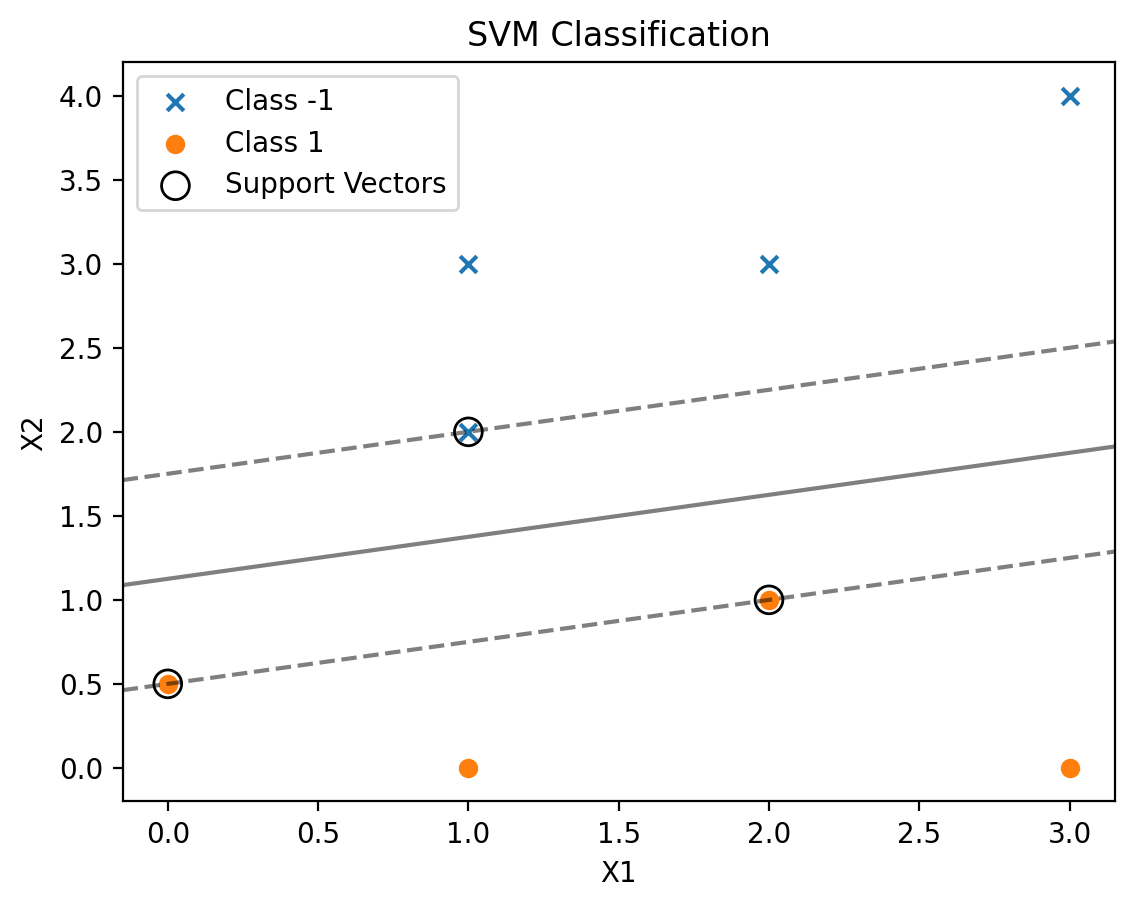

Equation of the separating hyperplane: 0.40x1 + -1.60x2 + 1.80 = 0
Equation of the positive margin hyperplane: 0.40x1 + -1.60x2 + 1.80 = 1
Equation of the negative margin hyperplane: 0.40x1 + -1.60x2 + 1.80 = -1
w: [ 0.39981536 -1.59926145]
b: 1.7993229938486222


In [ ]:
### your solution here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

X_neg = np.array([[1, 2], [1, 3], [2, 3], [3, 4]])
y_neg = np.array([-1, -1, -1, -1])
X_pos = np.array([[0, 0.5], [1, 0], [2, 1], [3, 0]])
y_pos = np.array([1, 1, 1, 1])

X = np.concatenate((X_neg, X_pos))
y = np.concatenate((y_neg, y_pos))

svm_classifier = SVC(kernel='linear', C=1e10)  # Use a large C for hard-margin SVM

svm_classifier.fit(X, y)

# Get the support vectors
support_vectors = svm_classifier.support_vectors_

# Get the weights and bias of the separating hyperplane
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]

# Plot the data points
plt.scatter(X_neg[:, 0], X_neg[:, 1], marker='x', label='Class -1')
plt.scatter(X_pos[:, 0], X_pos[:, 1], marker='o', label='Class 1')

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot the separating hyperplane and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification')
plt.legend()
plt.show()

# Print the equations of the hyperplanes
print("Equation of the separating hyperplane:", f"{w[0]:.2f}x1 + {w[1]:.2f}x2 + {b:.2f} = 0")
print("Equation of the positive margin hyperplane:", f"{w[0]:.2f}x1 + {w[1]:.2f}x2 + {b:.2f} = 1")
print("Equation of the negative margin hyperplane:", f"{w[0]:.2f}x1 + {w[1]:.2f}x2 + {b:.2f} = -1")

# Print the weights and bias
print("w:", w)
print("b:", b)

**What to Submit:**
- **Part a:** Write down support vectors and equations. Graph the points, hyperplanes, and w.
- **Part b:** Solution and corresponding calculations.

# Kernels

**2.3** Suppose that our inputs x are one-dimensional and that our feature map is infinite-dimensional:
$\phi(x)$ is a vector whose ith component is:

$$
    \frac{1}{\sqrt{i!}}\exp\left(-\frac{x^{2}}{2}\right)x^{i},
$$

for all nonnegative integers $i$. (Thus, $\phi$ is an infinite-dimensional vector.)

**a.** [2 points] Show that $k(x, x′) = \exp\left(−\frac{(x-x')^{2}}{2}\right)$ is a kernel function for this feature map, i.e.,

$$
\phi(x)\cdot\phi(x') = \exp\left(−\frac{(x-x')^{2}}{2}\right)
$$

**Hint:** Use the Taylor expansion of $z \mapsto \exp(-z)$. (This is the one dimensional version of the Gaussian (RBF) kernel).

**your answer here**

$$
$$

**b.** [5 points] Plot $x$ vs $\exp\left(−\frac{x^{2}}{2}\right)$, and $x$ vs $\phi(x)\cdot\phi(0)$ for $10, 100, 500$ dimensions over the range $x \in [-5,5]$. on the same graph.

/var/folders/rj/rdt4n7wx241065t043w0hlvw0000gn/T/ipykernel_83877/3968943063.py:14: RuntimeWarning: overflow encountered in power
  result += (1 / np.sqrt(scipy.special.factorial(i))) * np.exp(-x**2 / 2) * x**i * (1 / np.sqrt(scipy.special.factorial(i))) * np.exp(0) * 0**i
/var/folders/rj/rdt4n7wx241065t043w0hlvw0000gn/T/ipykernel_83877/3968943063.py:14: RuntimeWarning: invalid value encountered in multiply
  result += (1 / np.sqrt(scipy.special.factorial(i))) * np.exp(-x**2 / 2) * x**i * (1 / np.sqrt(scipy.special.factorial(i))) * np.exp(0) * 0**i


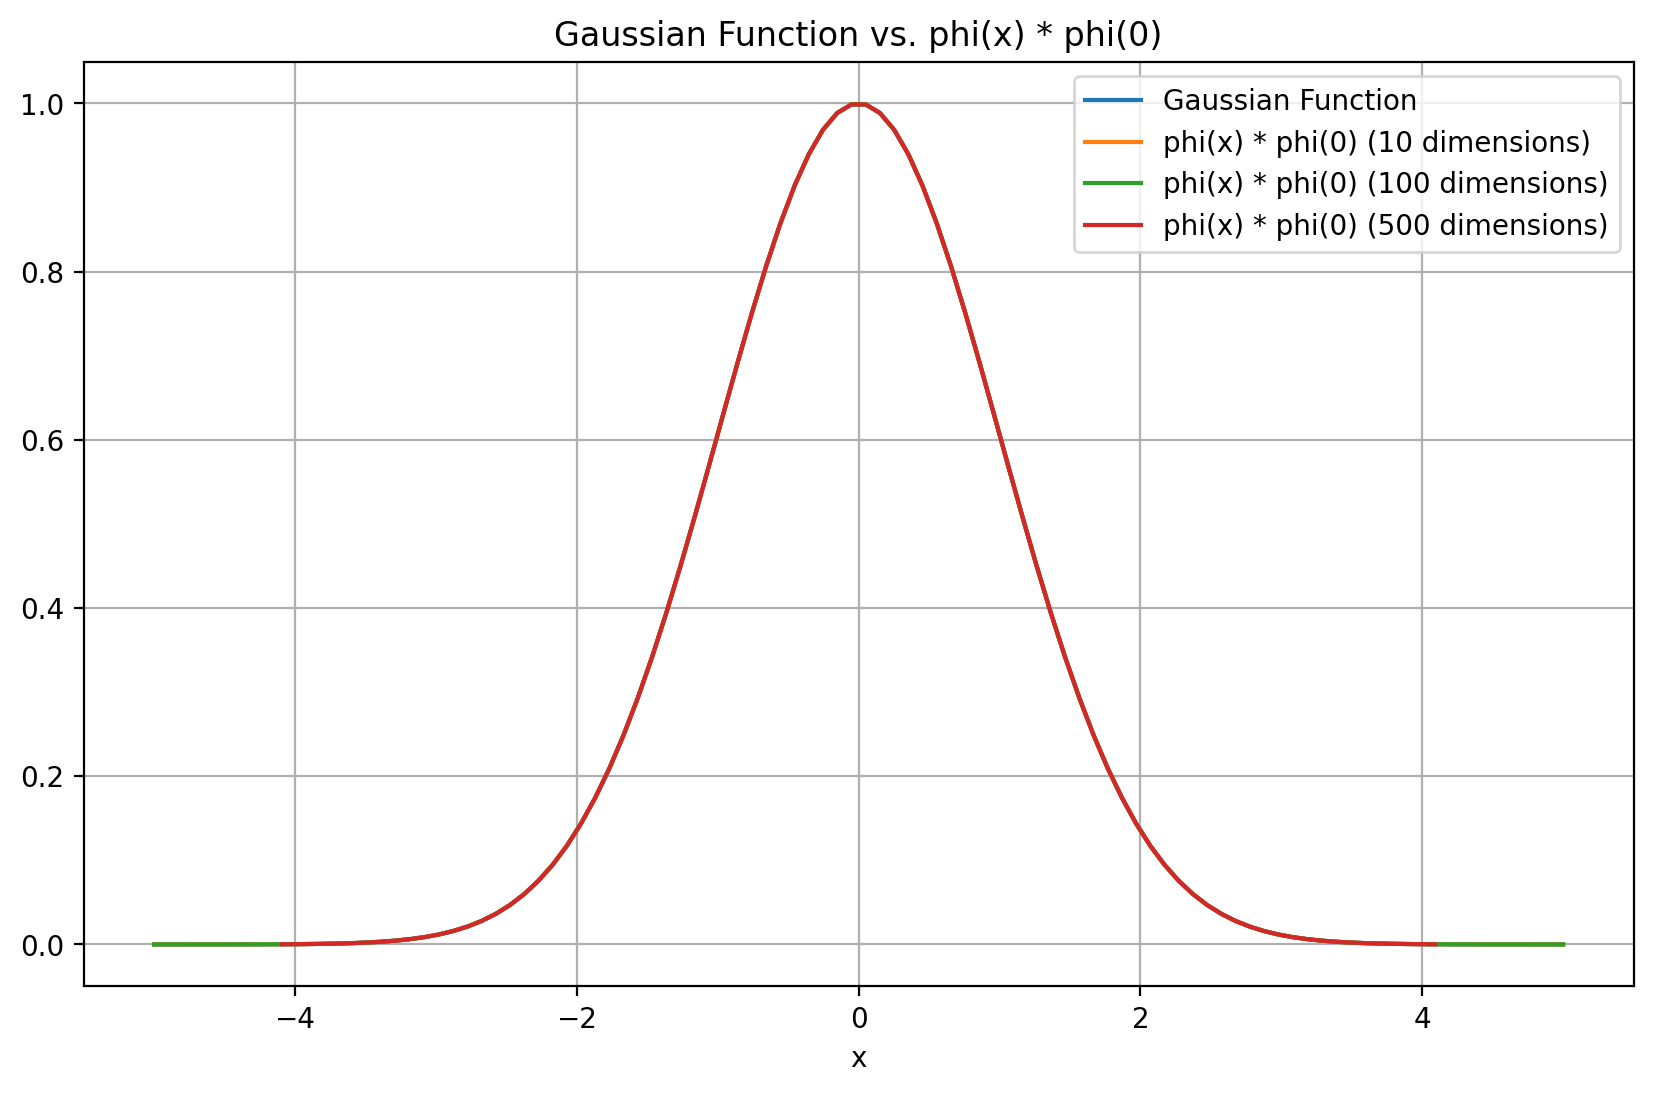

In [12]:
### your answer here
import scipy

x = np.linspace(-5, 5, 100)

# Define the Gaussian function
def gaussian_function(x):
    return np.exp(-x**2 / 2)

# Define phi(x) * phi(0) for a given number of dimensions
def phi_inner_product(x, dimensions):
    result = 0
    for i in range(dimensions):
        result += (1 / np.sqrt(scipy.special.factorial(i))) * np.exp(-x**2 / 2) * x**i * (1 / np.sqrt(scipy.special.factorial(i))) * np.exp(0) * 0**i
        # result += (1 / np.sqrt(scipy.special.factorial(i))) * np.exp(-x**2 / 2) * x**i # use kernel function 
    return result



plt.figure(figsize=(10, 6))
plt.plot(x, gaussian_function(x), label="Gaussian Function")
for dimensions in [10, 100, 500]:
    plt.plot(x, phi_inner_product(x, dimensions), label=f"phi(x) * phi(0) ({dimensions} dimensions)")

plt.xlabel("x")
plt.title("Gaussian Function vs. phi(x) * phi(0)")
plt.legend()
plt.grid(True)
plt.show()

**What to Submit:**
- **Part a:** Solution and corresponding calculations
- **Part b:** Graph and 1-2 sentences on your observations.

**2.4** This problem will get you familiar with kernel ridge regression using the polynomial and RBF kernels.
First, let’s generate some data. Let $n = 30$ and $f_{∗}(x) = 4 \sin(\pi x) \cos(6\pi x^{2} )$. For $i = 1, \ldots, n$ let each $x_i$ be drawn uniformly at random from $[0, 1]$, and let $y_i = f_{∗}(x_i) + \epsilon_i$ where $\epsilon_i \sim \mathcal{N}(0, 1)$. For any function $f$, the true error and the train error are respectively defined as:

$$
\mathcal{E}_\mathrm{true}(f) = \mathbb{E}_{X,Y}[(f(X)-Y)^{2}], \hat{\mathcal{E}}_\mathrm{train}(f) = \frac{1}{n}\sum_{i=1}^{n} (f(x_{i})- y_{i})^2.
$$

Now, our goal is, using kernel ridge regression, to construct a predictor:

$$
\hat{\alpha} = \arg\min_{\alpha} \|K\alpha - y \|^{2}_{2} + \lambda \alpha^{T}K\alpha, \hat{f}(x) = \sum_{i=1}^{n}\hat{\alpha}_{i}k(x_i,x)
$$

where $K \in \mathbb{R}^{n \times n}$ is the kernel matrix such that $K_{i,j} = k(x_i,x_j)$, and $\lambda \geq 0$ is the regularization constant.

In [13]:
def f_true(x: np.ndarray) -> np.ndarray:
    """True function, which was used to generate data.
    Should be used for plotting.

    Args:
        x (np.ndarray): A (n,) array. Input.

    Returns:
        np.ndarray: A (n,) array.
    """
    return 4 * np.sin(np.pi * x) * np.cos(6 * np.pi * x ** 2)


**a.** [10 points] Using leave-one-out cross validation, find a good $\lambda$ and hyperparameter settings for the following kernels:
- $k_\mathrm{poly}(x, z) = (1 + x^{⊤}z)^{d}$ where $d \in \mathbb{N}$ is a hyperparameter,2
- $k_\mathrm{rbf}(x, z) = \exp\left(−\gamma\|x − z\|^{2} \right)$ where $\gamma > 0$ is a hyperparameter 1 .

We strongly recommend implementing either grid search or random search. **Do not use ```sklearn```**, but
actually implement of these algorithms. Reasonable values to look through in this problem are: $\lambda \in  10^{[−5,−1] }$, $d \in [5, 25]$, $\gamma$ sampled from a narrow gaussian distribution centered the median of all squared distances in the dataset, *i.e.*: Given a dataset $x_{1}, \ldots, x_{n} \in \mathrm{R}^{d}$, a heuristic for choosing a range of $\gamma$ in the right ballpark is the inverse of the median of all $\begin{pmatrix}n \\ 2 \end{pmatrix}$ squared distances $\|x_i − x_j \|_{2}^{2}$.

`Report the values of $d$, $\gamma$, and the $\lambda$ values for both kernels.

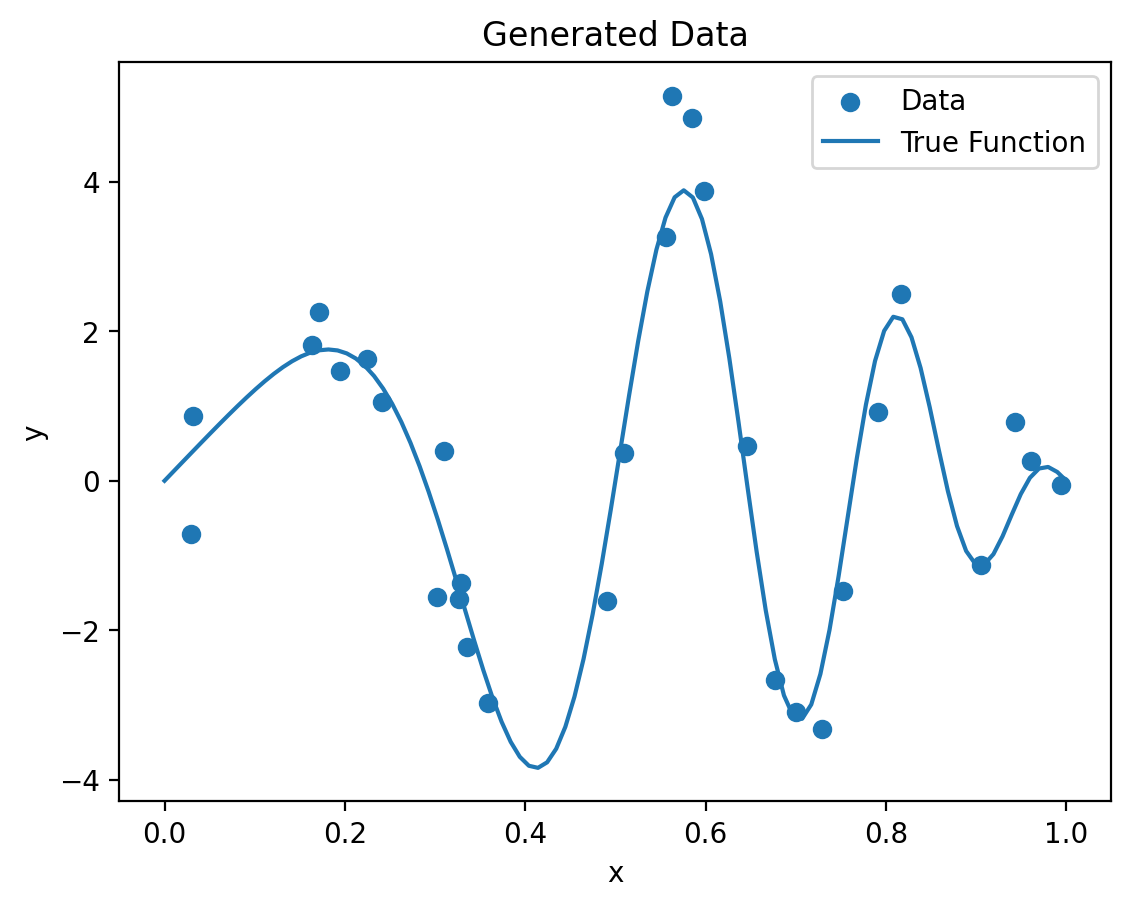

In [14]:
n = 30
x = np.random.uniform(0, 1, n)
y = f_true(x) + np.random.normal(0, 1, n)

# Plot the generated data
plt.scatter(x, y, label="Data")
plt.plot(np.linspace(0, 1, 100), f_true(np.linspace(0, 1, 100)), label="True Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Generated Data")
plt.show()

In [17]:
def poly_kernel(x_i: np.ndarray, x_j: np.ndarray, d: int) -> np.ndarray:
    """Polynomial kernel.

    Given two indices a and b it should calculate:
    K[a, b] = (x_i[a] * x_j[b] + 1)^d

    Args:
        x_i (np.ndarray): An (n,) array. Observations (Might be different from x_j).
        x_j (np.ndarray): An (m,) array. Observations (Might be different from x_i).
        d (int): Degree of polynomial.

    Returns:
        np.ndarray: A (n, m) matrix, where each element is as described above (see equation for K[a, b])

    Note:
        - It is crucial for this function to be vectorized, and not contain for-loops.
            It will be called a lot, and it has to be fast for reasonable run-time.
        - You might find .outer functions useful for this function.
            They apply an operation similar to xx^T (if x is a vector), but not necessarily with multiplication.
            To use it simply append .outer to function. For example: np.add.outer, np.divide.outer
    """
    # Calculate the outer product of x_i and x_j
    outer_product = np.outer(x_i, x_j)
    
    # Add 1 to the outer product
    result = outer_product + 1
    
    # Raise the result to the power of d
    result = np.power(result, d)
    
    return result
    # raise NotImplementedError("Your Code Goes Here")


def rbf_kernel(x_i: np.ndarray, x_j: np.ndarray, gamma: float) -> np.ndarray:
    """Radial Basis Function (RBF) kernel.

    Given two indices a and b it should calculate:
    K[a, b] = exp(-gamma*(x_i[a] - x_j[b])^2)

    Args:
        x_i (np.ndarray): An (n,) array. Observations (Might be different from x_j).
        x_j (np.ndarray): An (m,) array. Observations (Might be different from x_i).
        gamma (float): Gamma parameter for RBF kernel. (Inverse of standard deviation)

    Returns:
        np.ndarray: A (n, m) matrix, where each element is as described above (see equation for K[a, b])

    Note:
        - It is crucial for this function to be vectorized, and not contain for-loops.
            It will be called a lot, and it has to be fast for reasonable run-time.
        - You might find .outer functions useful for this function.
            They apply an operation similar to xx^T (if x is a vector), but not necessarily with multiplication.
            To use it simply append .outer to function. For example: np.add.outer, np.divide.outer
    """
    # Calculate the squared Euclidean distance using broadcasting
    distances_squared = np.sum((x_i[:, np.newaxis] - x_j)**2, axis=2)

    # Calculate the RBF kernel matrix
    kernel_matrix = np.exp(-gamma * distances_squared)

    return kernel_matrix
    # raise NotImplementedError("Your Code Goes Here")

def train(
    x: np.ndarray,
    y: np.ndarray,
    # kernel_function: Union[poly_kernel, rbf_kernel],  # type: ignore
    # kernel_param: Union[int, float],
    kernel_function,
    kernel_param,
    _lambda: float,
) -> np.ndarray:
    """Trains and returns an alpha vector, that can be used to make predictions.

    Args:
        x (np.ndarray): Array of shape (n,). Observations.
        y (np.ndarray): Array of shape (n,). Targets.
        kernel_function (Union[poly_kernel, rbf_kernel]): Either poly_kernel or rbf_kernel functions.
        kernel_param (Union[int, float]): Gamma (if kernel_function is rbf_kernel) or d (if kernel_function is poly_kernel).
        _lambda (float): Regularization constant.

    Returns:
        np.ndarray: Array of shape (n,) containing alpha hat as described in the pdf.
    """
    # Calculate the kernel matrix
    K = kernel_function(x, x, kernel_param)

    # Calculate alpha hat using the formula from the problem statement
    n = len(x)
    alpha_hat = np.linalg.solve(K + _lambda * np.eye(n), y) 

    return alpha_hat
    # raise NotImplementedError("Your Code Goes Here")


def cross_validation(
    x: np.ndarray,
    y: np.ndarray,
    # kernel_function: Union[poly_kernel, rbf_kernel],  # type: ignore
    # kernel_param: Union[int, float],
    kernel_function,
    kernel_param,
    _lambda: float,
    num_folds: int,
) -> float:
    """Performs cross validation.

    In a for loop over folds:
        1. Set current fold to be validation, and set all other folds as training set.
        2, Train a function on training set, and then get mean squared error on current fold (validation set).
    Return validation loss averaged over all folds.

    Args:
        x (np.ndarray): Array of shape (n,). Observations.
        y (np.ndarray): Array of shape (n,). Targets.
        kernel_function (Union[poly_kernel, rbf_kernel]): Either poly_kernel or rbf_kernel functions.
        kernel_param (Union[int, float]): Gamma (if kernel_function is rbf_kernel) or d (if kernel_function is poly_kernel).
        _lambda (float): Regularization constant.
        num_folds (int): Number of folds. It should be either len(x) for LOO, or 10 for 10-fold CV.

    Returns:
        float: Average loss of trained function on validation sets across folds.
    """
    fold_size = len(x) // num_folds
    total_loss = 0

    for i in range(num_folds):
        # Split data into training and validation sets for the current fold
        validation_indices = np.arange(i * fold_size, (i + 1) * fold_size)
        training_indices = np.concatenate([np.arange(0, i * fold_size), np.arange((i + 1) * fold_size, n)])

        x_train_fold = x[training_indices]
        y_train_fold = y[training_indices]
        x_validation_fold = x[validation_indices]
        y_validation_fold = y[validation_indices]

        # Train the model on the training set for the current fold
        alpha_hat = train(x_train_fold, y_train_fold, kernel_function, kernel_param, _lambda)

        # Calculate predictions on the validation set
        K_validation = kernel_function(x_validation_fold, x_train_fold, kernel_param)
        predictions = K_validation @ alpha_hat

        # Calculate the loss for the current fold
        fold_loss = np.mean((predictions - y_validation_fold)**2)
        total_loss += fold_loss

    # Calculate and return the average loss across all folds
    average_loss = total_loss / num_folds
    return average_loss
    # raise NotImplementedError("Your Code Goes Here")


def rbf_param_search(
    x: np.ndarray, y: np.ndarray, num_folds: int
# ) -> Tuple[float, float]:
):
    """
    Parameter search for RBF kernel.

    There are two possible approaches:
        - Grid Search - Fix possible values for lambda, loop over them and record value with the lowest loss.
        - Random Search - Fix number of iterations, during each iteration sample lambda from some distribution and record value with the lowest loss.

    Args:
        x (np.ndarray): Array of shape (n,). Observations.
        y (np.ndarray): Array of shape (n,). Targets.
        num_folds (int): Number of folds. It should be either len(x) for LOO, or 10 for 10-fold CV.

    Returns:
        Tuple[float, float]: Tuple containing best performing lambda and gamma pair.

    Note:
        - You do not really need to search over gamma. 1 / median(dist(x_i, x_j)^2 for all unique pairs x_i, x_j in x)
            should be sufficient for this problem. That being said you are more than welcome to do so.
        - If using random search we recommend sampling lambda from distribution 10**i, where i~Unif(-5, -1)
        - If using grid search we recommend choosing possible lambdas to 10**i, where i=linspace(-5, -1)
    """
    # Calculate gamma based on median of squared distances
    distances_squared = np.sum((x[:, np.newaxis] - x)**2, axis=2)
    gamma = 1 / np.median(distances_squared[np.triu_indices(len(x), k=1)])

    # Define possible lambda values
    lambdas = np.logspace(-5, -1, num=50)  # Adjust range and number as needed

    # Perform grid search
    best_lambda = None
    best_loss = float('inf')

    for _lambda in lambdas:
        loss = cross_validation(x, y, rbf_kernel, gamma, _lambda, num_folds)
        if loss < best_loss:
            best_loss = loss
            best_lambda = _lambda

    return best_lambda, gamma
    # raise NotImplementedError("Your Code Goes Here")

def poly_param_search(
    x: np.ndarray, y: np.ndarray, num_folds: int
# ) -> Tuple[float, int]:
):
    """
    Parameter search for Poly kernel.

    There are two possible approaches:
        - Grid Search - Fix possible values for lambdas and ds.
            Have nested loop over all possibilities and record value with the lowest loss.
        - Random Search - Fix number of iterations, during each iteration sample lambda, d from some distributions and record value with the lowest loss.

    Args:
        x (np.ndarray): Array of shape (n,). Observations.
        y (np.ndarray): Array of shape (n,). Targets.
        num_folds (int): Number of folds. It should be either len(x) for LOO, or 10 for 10-fold CV.

    Returns:
        Tuple[float, int]: Tuple containing best performing lambda and d pair.

    Note:
        - You do not really need to search over gamma. 1 / median((x_i - x_j) for all unique pairs x_i, x_j in x)
            should be sufficient for this problem. That being said you are more than welcome to do so.
        - If using random search we recommend sampling lambda from distribution 10**i, where i~Unif(-5, -1)
            and d from distribution {7, 8, ..., 20, 21}
        - If using grid search we recommend choosing possible lambdas to 10**i, where i=linspace(-5, -1)
            and possible ds to [7, 8, ..., 20, 21]
    """
    # Define possible lambda and d values
    lambdas = np.logspace(-5, -1, num=50)  # Adjust range and number as needed
    ds = np.arange(7, 22)  # d values from 7 to 21

    # Perform grid search
    best_lambda = None
    best_d = None
    best_loss = float('inf')

    for _lambda in lambdas:
        for d in ds:
            loss = cross_validation(x, y, poly_kernel, d, _lambda, num_folds)
            if loss < best_loss:
                best_loss = loss
                best_lambda = _lambda
                best_d = d

    return best_lambda, best_d
    # raise NotImplementedError("Your Code Goes Here")

In [18]:
# Perform parameter search
best_lambda_rbf, gamma = rbf_param_search(x.reshape(-1, 1), y, num_folds=len(x))
best_lambda_poly, d = poly_param_search(x, y, num_folds=len(x))

# Train models
alpha_hat_rbf = train(x.reshape(-1, 1), y, rbf_kernel, gamma, best_lambda_rbf)
alpha_hat_poly = train(x, y, poly_kernel, d, best_lambda_poly)


# Report values
print("RBF Kernel: lambda =", best_lambda_rbf, ", gamma =", gamma)
print("Polynomial Kernel: lambda =", best_lambda_poly, ", d =", d)

RBF Kernel: lambda = 7.906043210907701e-05 , gamma = 11.407585300579592
Polynomial Kernel: lambda = 1.2067926406393289e-05 , d = 21


**b.** [10 points] Let $\hat{f}_\mathrm{poly}(x)$ and $\hat{f}_\mathrm{rbf}(x)$ be the functions learned using the hyperparameters you found in part a. For a single plot per function $f \in f_\mathrm{poly}(x)$, $f_\mathrm{rbf}(x)$, plot the original data $\{(x_i , y_i )\}^{n}_{i=1}$ , the true $f(x)$, and $\hat{f}(x)$ (i.e., define a fine grid on $[0, 1]$ to plot the functions).

/var/folders/rj/rdt4n7wx241065t043w0hlvw0000gn/T/ipykernel_83877/2805757482.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat_rbf[i] += alpha_hat_rbf[j] * rbf_kernel(np.array([x_grid.reshape(-1, 1)[i]]), np.array([x.reshape(-1, 1)[j]]), gamma)
/var/folders/rj/rdt4n7wx241065t043w0hlvw0000gn/T/ipykernel_83877/2805757482.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat_poly[i] += alpha_hat_poly[j] * poly_kernel(np.array([x_grid[i]]), np.array([x[j]]), d)


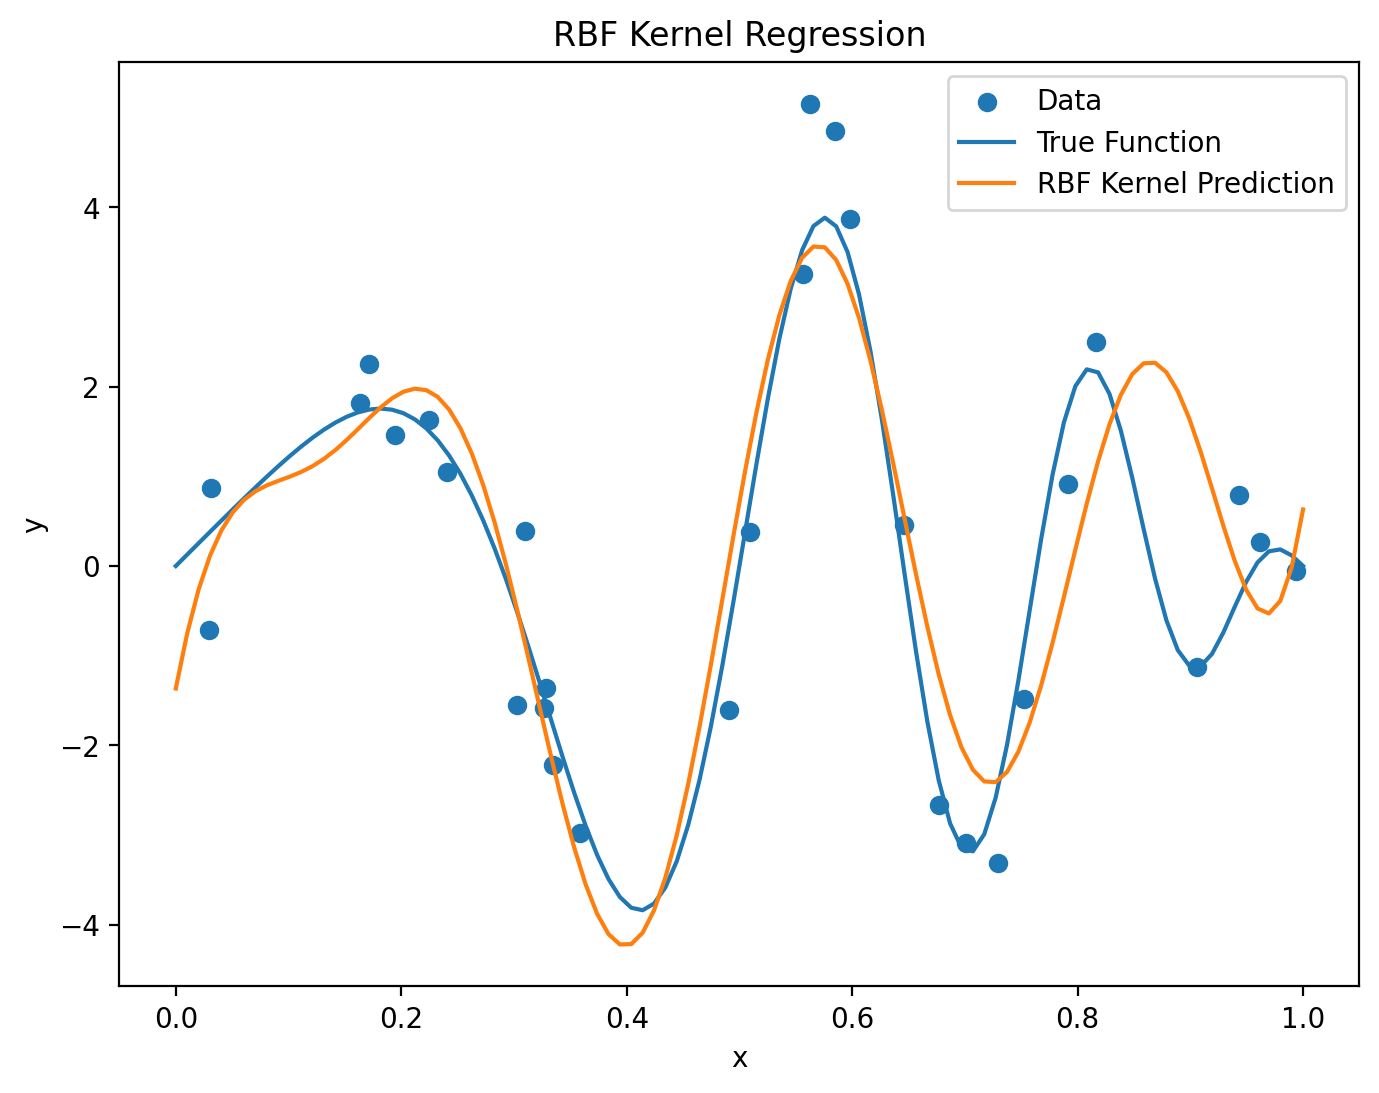

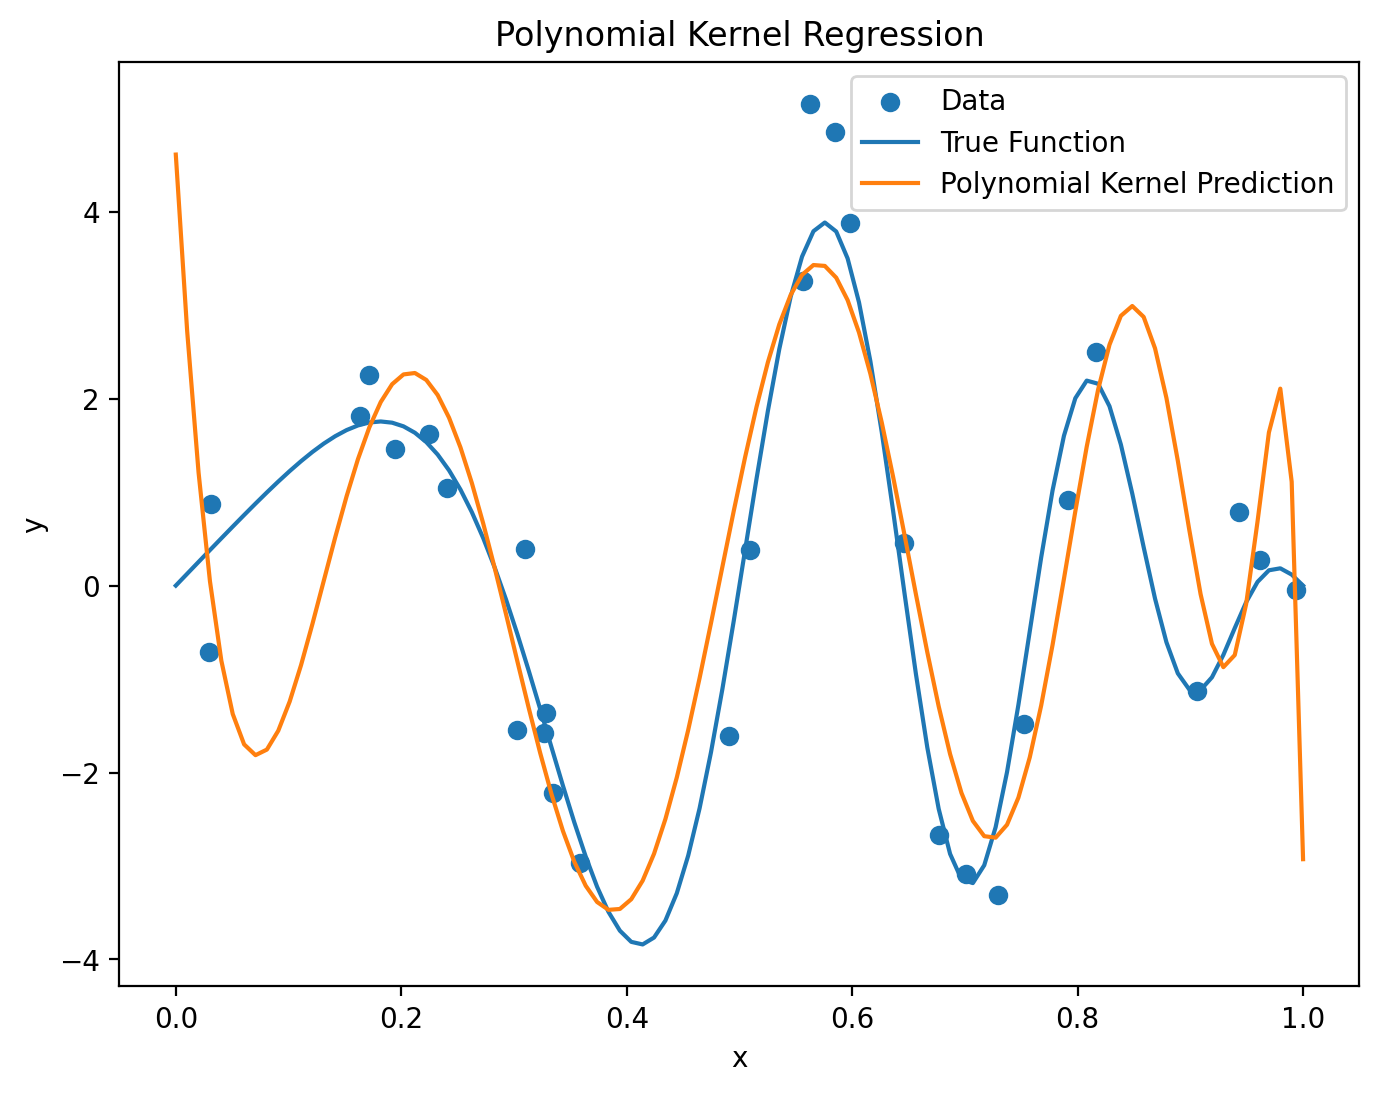

In [19]:
### your code here
# Fine grid for plotting
x_grid = np.linspace(0, 1, 100) 

# RBF kernel predictions
y_hat_rbf = np.zeros_like(x_grid)
for i in range(len(x_grid)):
    for j in range(len(x)):
        y_hat_rbf[i] += alpha_hat_rbf[j] * rbf_kernel(np.array([x_grid.reshape(-1, 1)[i]]), np.array([x.reshape(-1, 1)[j]]), gamma)

# Polynomial kernel predictions
y_hat_poly = np.zeros_like(x_grid)
for i in range(len(x_grid)):
    for j in range(len(x)):
        y_hat_poly[i] += alpha_hat_poly[j] * poly_kernel(np.array([x_grid[i]]), np.array([x[j]]), d)

# Plot RBF kernel results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data")
plt.plot(x_grid, f_true(x_grid), label="True Function")
plt.plot(x_grid, y_hat_rbf, label="RBF Kernel Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("RBF Kernel Regression")
plt.legend()
plt.show()

# Plot polynomial kernel results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data")
plt.plot(x_grid, f_true(x_grid), label="True Function")
plt.plot(x_grid, y_hat_poly, label="Polynomial Kernel Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Kernel Regression")
plt.legend()
plt.show()

**c.** [5 points] Repeat parts a and b with $n = 300$, but use 10-fold CV instead of leave-one-out for part a.

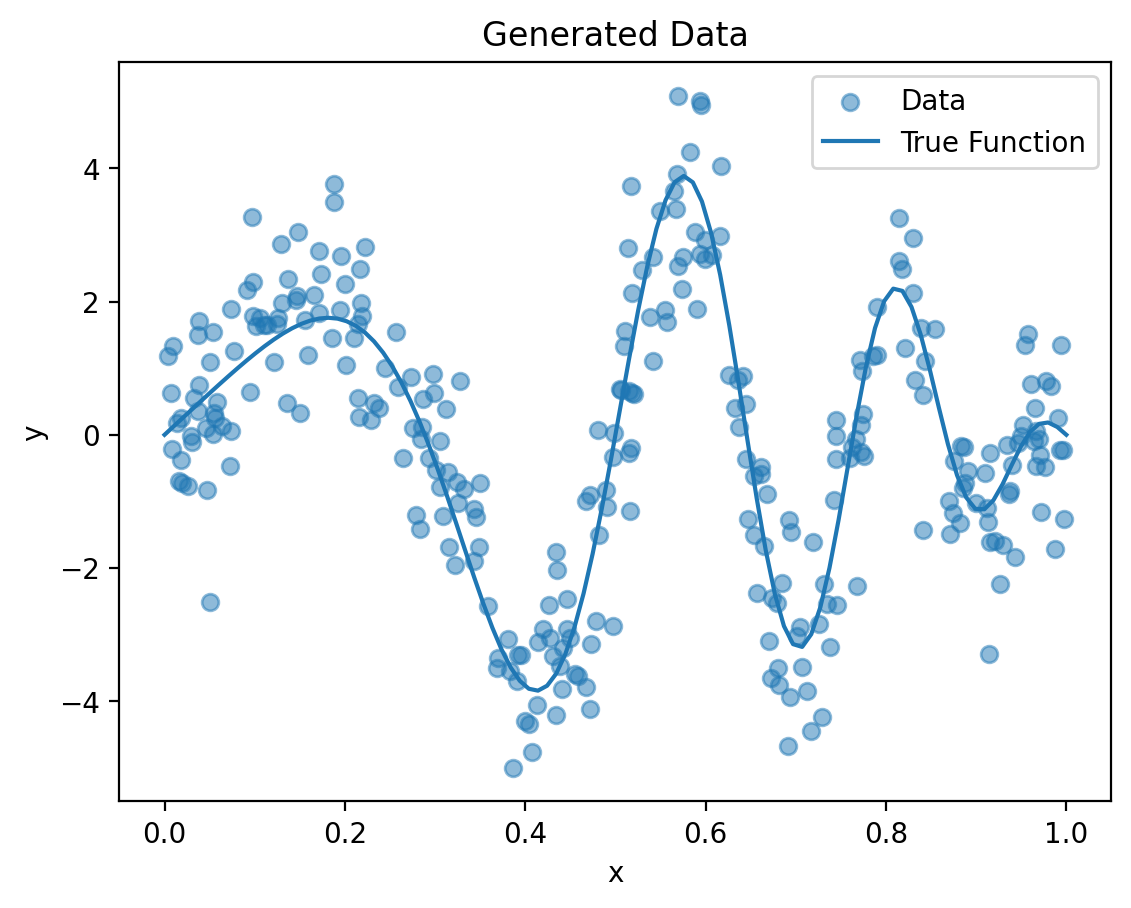

In [ ]:
### your code here 
n = 300 # 300 data points
x = np.random.uniform(0, 1, n)
y = f_true(x) + np.random.normal(0, 1, n)

# Plot the generated data
plt.scatter(x, y, label="Data",alpha=0.5)
plt.plot(np.linspace(0, 1, 100), f_true(np.linspace(0, 1, 100)), label="True Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Generated Data")
plt.show()

In [21]:
# Perform parameter search
best_lambda_rbf, gamma = rbf_param_search(x.reshape(-1, 1), y, num_folds=10) # 10-fold CV
best_lambda_poly, d = poly_param_search(x, y, num_folds=10)

# Train models
alpha_hat_rbf = train(x.reshape(-1, 1), y, rbf_kernel, gamma, best_lambda_rbf)
alpha_hat_poly = train(x, y, poly_kernel, d, best_lambda_poly)


# Report values
print("RBF Kernel: lambda =", best_lambda_rbf, ", gamma =", gamma)
print("Polynomial Kernel: lambda =", best_lambda_poly, ", d =", d)

RBF Kernel: lambda = 1e-05 , gamma = 11.032637243329795
Polynomial Kernel: lambda = 1e-05 , d = 21


/var/folders/rj/rdt4n7wx241065t043w0hlvw0000gn/T/ipykernel_83877/752727429.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat_rbf[i] += alpha_hat_rbf[j] * rbf_kernel(np.array([x_grid.reshape(-1, 1)[i]]), np.array([x.reshape(-1, 1)[j]]), gamma)
/var/folders/rj/rdt4n7wx241065t043w0hlvw0000gn/T/ipykernel_83877/752727429.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat_poly[i] += alpha_hat_poly[j] * poly_kernel(np.array([x_grid[i]]), np.array([x[j]]), d)


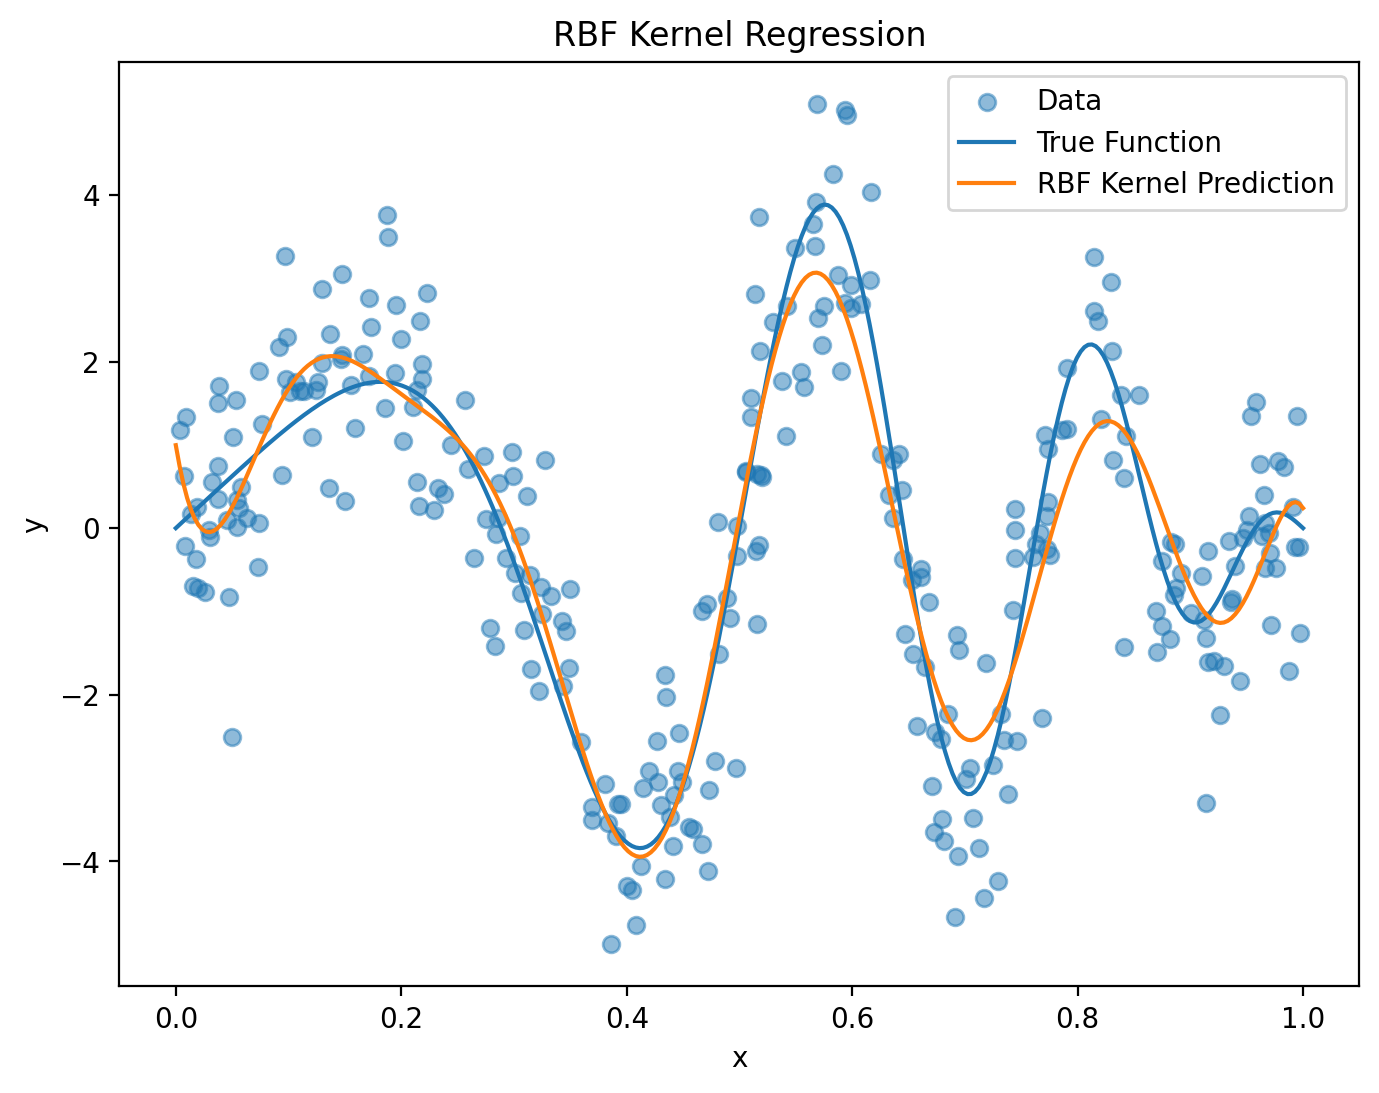

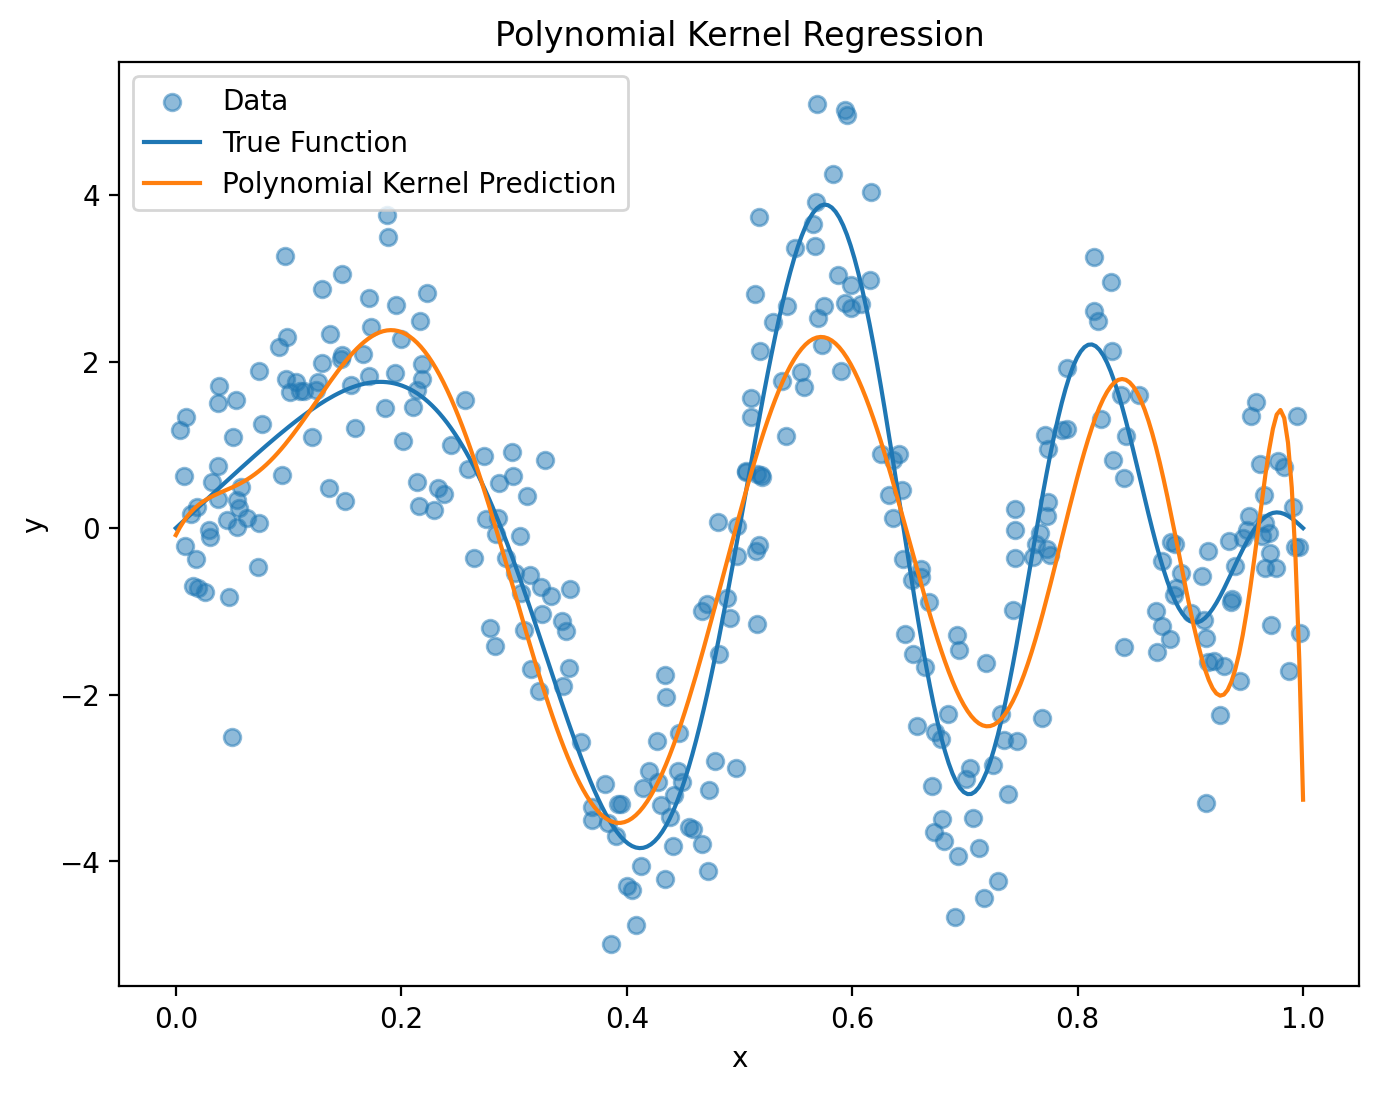

In [22]:
# Make predictions for plotting
x_grid = np.linspace(0, 1, 300)  # Fine grid for plotting

# RBF kernel predictions
y_hat_rbf = np.zeros_like(x_grid)
for i in range(len(x_grid)):
    for j in range(len(x)):
        y_hat_rbf[i] += alpha_hat_rbf[j] * rbf_kernel(np.array([x_grid.reshape(-1, 1)[i]]), np.array([x.reshape(-1, 1)[j]]), gamma)

# Polynomial kernel predictions
y_hat_poly = np.zeros_like(x_grid)
for i in range(len(x_grid)):
    for j in range(len(x)):
        y_hat_poly[i] += alpha_hat_poly[j] * poly_kernel(np.array([x_grid[i]]), np.array([x[j]]), d)

# Plot RBF kernel results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data",alpha=0.5)
plt.plot(x_grid, f_true(x_grid), label="True Function")
plt.plot(x_grid, y_hat_rbf, label="RBF Kernel Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("RBF Kernel Regression")
plt.legend()
plt.show()

# Plot polynomial kernel results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data",alpha=0.5)
plt.plot(x_grid, f_true(x_grid), label="True Function")
plt.plot(x_grid, y_hat_poly, label="Polynomial Kernel Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Kernel Regression")
plt.legend()
plt.show()

**What to Submit:**
- **Part a:** Report the values of $d$, $\gamma$ and the value of $\lambda$ for both kernels as described.
- **Part b:** Two plots. One plot for each function.
- **Part c:** Values of $d$, $\gamma$, and the value of $\lambda$ for both kernels as described. In addition, provide two separate plots as you did for part b.